Imporing Libraries


In [300]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data as car_data

In [301]:
car_data = pd.read_csv('data.csv')

In [302]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [303]:
# Remove irrelevant columns
car_data = car_data.drop(['car_ID', 'symboling'], axis=1)

In [304]:
car_data["CarName"] = car_data["CarName"].str.split(' ').str.slice(0,1).str.join(" ")

In [305]:
# Convert categorical variables using LabelEncoder
cat_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for col in car_data.columns:
    # Check if the data type of the column is object
    if car_data[col].dtype == 'object':
        # Apply onehotencoder to the column using the OneHotEncoder class
        encoder = OneHotEncoder()
        encoded_col = encoder.fit_transform(car_data[[col]])
        # Replace the original column with the encoded column in the DataFrame
        car_data = car_data.drop(col, axis=1)
        df_encoded = pd.DataFrame(encoded_col.toarray(), columns=encoder.get_feature_names_out([col]))
        car_data = pd.concat([car_data, df_encoded], axis=1)

In [306]:
# Split the data set into training and testing sets
X = car_data.drop('price', axis=1)
y = car_data['price']

In [307]:
# plt.figure(figsize=(200,200))
# sns.set_theme(style="white")
# corr = X.corr()
# heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
# plt.show()

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state= 36)

In [309]:
# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [310]:
# Test the model
train_pred = regressor.predict(X_train)


In [311]:
# Evaluating Logistic Regression model
print("Accuracy: ",regressor.score(X_train,y_train) * 100)

Accuracy:  97.2748705808334


In [312]:
error_scroe = print("R-squared score:", r2_score(y_train, train_pred))

R-squared score: 0.972748705808334


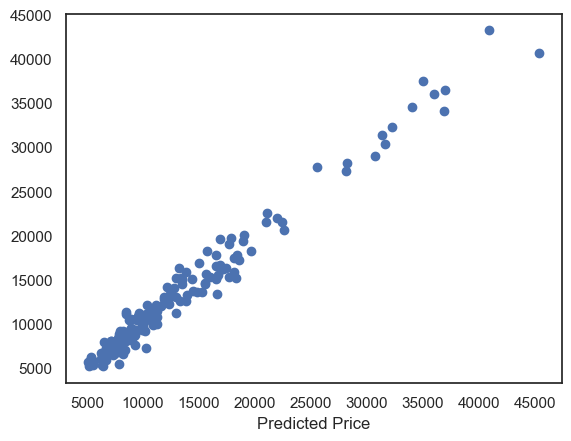

In [313]:
import matplotlib.pyplot as plt
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.show()

In [314]:
# Test the model
test_pred = regressor.predict(X_test)

In [315]:
error_scroe = print("R-squared score:", r2_score(y_test, test_pred))

R-squared score: 0.9206556967009473


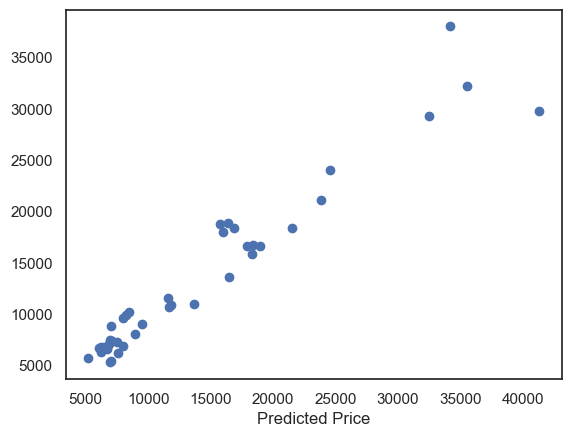

In [316]:
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.show()

Lasso Regresson

In [317]:
from sklearn.linear_model import Lasso

In [318]:
# Train the linear regression model
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

C:\Users\ppppr\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+08, tolerance: 9.668e+05
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [319]:
# Test the model
train_pred = lasso_regressor.predict(X_train)

In [320]:
error_scroe = print("R-squared score:", r2_score(y_train, train_pred))

R-squared score: 0.9725522607083281


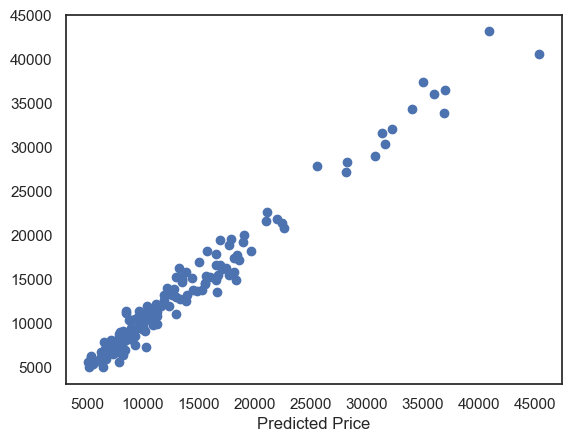

In [321]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.show()

In [322]:
# Test the model
test_pred = lasso_regressor.predict(X_test)

In [323]:
error_scroe = print("R-squared score:", r2_score(y_test, test_pred))

R-squared score: 0.921200351638743


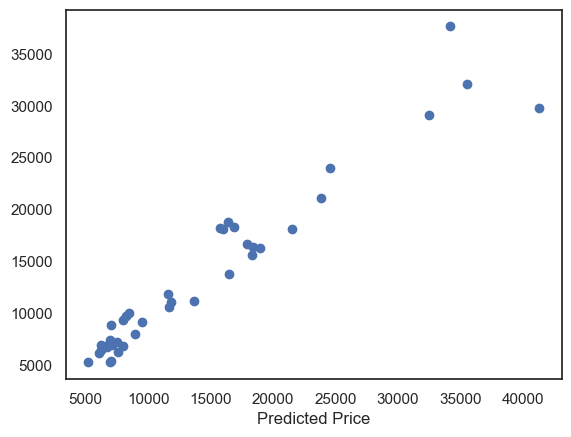

In [324]:
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Price")
plt.xlabel("Predicted Price")
plt.show()